# We'll do the multi-classes classification.
In this case, it's one label and multi classes. Besides, the parameter 'num_words' still represent how many the most common words should be taken into consideration.

In [40]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
print("Training data' shape:"+str(train_data.shape)+". Training labels' shape:"+str(train_labels.shape))
print("Testing data' shape:"+str(test_data.shape)+". Testing labels' shape:"+str(test_labels.shape))
print("The class nums is "+str(np.max(train_labels)+1))

Training data' shape:(8982,). Training labels' shape:(8982,)
Testing data' shape:(2246,). Testing labels' shape:(2246,)
The class nums is 46


# Get dictionary and reverse it.

In [41]:
dic=reuters.get_word_index()
dic_rev=dict([(v,k) for (k,v) in dic.items()])
decoded_newswires=" ".join([dic_rev.get(i-3,"?") for i in train_data[0]])
print("The content is:"+decoded_newswires)
print("The label is:"+str(train_labels[0]))

The content is:? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
The label is:3


# Turn the data into vetors.

In [42]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize(seqs,dim=10000):
    outs=np.zeros((len(seqs),dim))
    for i,seq in enumerate(seqs):
        outs[i,seq]=1
    return outs

x_train=vectorize(train_data);y_train=to_categorical(train_labels)
x_test=vectorize(test_data);y_test=to_categorical(test_labels)

print("One sample of x_train:"+str(x_train[0]))
print("One sample of y_train:"+str(y_train[0])+" The label is:"+str(np.argmax(y_train[0])))

One sample of x_train:[ 0.  1.  1. ...,  0.  0.  0.]
One sample of y_train:[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] The label is:3


# Attention! As it's a 46 classes classification, make the hidden units bigger than classes nums to aviod information bottleneck.
It's a multi-class classification problem. So for the end layer, use the "softmax" as activation function. Besides, use "categorical_crossentropy" not "binary_crossentropy" as the loss function.

In [43]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [44]:
history=model.fit(x_train[1000:],y_train[1000:],
                 epochs=20,batch_size=512,
                 validation_data=(x_train[:1000],y_train[:1000]))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 120us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 86us/step - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.4591 - acc: 0.9035 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 

# Plot the history data

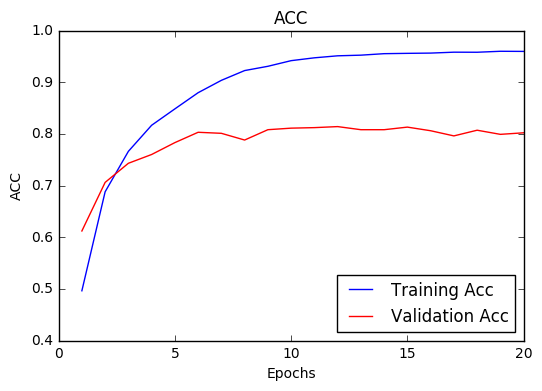

In [45]:
import matplotlib.pyplot as plt
history=history.history
train_acc=history["acc"];val_acc=history["val_acc"]
train_loss=history["loss"];val_loss=history["val_loss"]
epochs=np.arange(1,21)
plt.plot(epochs,train_acc,"b",label="Training Acc");plt.plot(epochs,val_acc,"r",label="Validation Acc")
plt.legend(loc="best");plt.title("ACC");plt.xlabel("Epochs");plt.ylabel("ACC");plt.show()


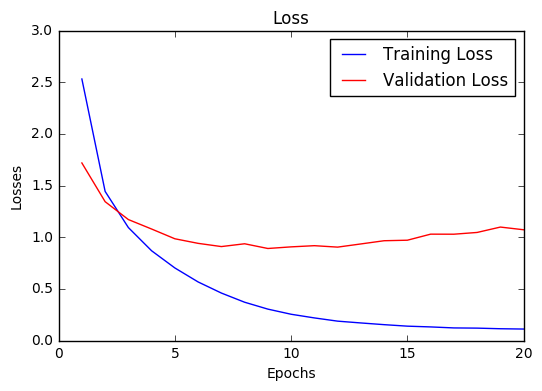

In [46]:
plt.plot(epochs,train_loss,"b",label="Training Loss");plt.plot(epochs,val_loss,"r",label="Validation Loss")
plt.legend(loc="best");plt.title("Loss");plt.xlabel("Epochs");plt.ylabel("Losses");plt.show()

In [47]:
results=model.evaluate(x_test,y_test)

print(results)

2246/2246 [==============================] - 0s 162us/step
[1.215810668330477, 0.77827248446981712]
